# Airbnb Data Analysis for Pacific Grove, CA

Data Source: http://insideairbnb.com/get-the-data.html
complied on October 21, 2021

In [ ]:
#In this project, 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df=pd.read_csv('listings.csv')

df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,22772,https://www.airbnb.com/rooms/22772,20211030181735,2021-10-30,Stay-Awhile at Lovers Pt. Pacific Grv,<b>The space</b><br />Very charming and artist...,NaN,https://a0.muscache.com/pictures/5075564/b006f...,87827,https://www.airbnb.com/users/show/87827,...,4.85,4.97,4.58,NaN,f,2,2,0,0,0.66
1,41014,https://www.airbnb.com/rooms/41014,20211030181735,2021-10-30,Ocean front 6-bedroom masterpiece,"In May 2015, Trip Advisor chose Pacific Grove ...","I call Pacific Grove ""Iowa with a Beach"". It ...",https://a0.muscache.com/pictures/70234717/9f86...,174738,https://www.airbnb.com/users/show/174738,...,4.94,4.98,4.78,NaN,f,1,1,0,0,2.47
2,44515,https://www.airbnb.com/rooms/44515,20211030181735,2021-10-30,Pet-Friendly* Cottage Near Beach for 30+ day s...,"Our quaint, thoughtfully-stocked 300 sq ft cot...","Hands down, the best part about our 'hood is t...",https://a0.muscache.com/pictures/c182c992-7f98...,195732,https://www.airbnb.com/users/show/195732,...,4.95,4.97,4.93,NaN,f,1,1,0,0,17.61
3,89210,https://www.airbnb.com/rooms/89210,20211030181735,2021-10-30,"CA Dreaming w/Ocean View, King Bed, Gardens","Wake to an ocean view from a King sized bed, w...","This is a safe, serene neighborhood with lots ...",https://a0.muscache.com/pictures/a775f318-bcd6...,130577,https://www.airbnb.com/users/show/130577,...,4.97,4.84,4.78,NaN,f,1,1,0,0,9.35
4,129723,https://www.airbnb.com/rooms/129723,20211030181735,2021-10-30,Modern Victorian with ocean view (30 day minimum),Long-term rental only! (30 day minimum).<br />...,Our home is in a centrally located and within ...,https://a0.muscache.com/pictures/7c1cbebb-8870...,639623,https://www.airbnb.com/users/show/639623,...,5.00,5.00,4.50,NaN,f,1,1,0,0,0.24


In [80]:
# Take a look at the column names
#df.columns.tolist()

In [7]:
# Descriptive statistics of numeric metrics
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.960000e+02,1.960000e+02,1.960000e+02,196.000000,196.000000,0.0,196.000000,196.000000,196.000000,0.0,...,161.000000,161.000000,161.000000,161.000000,0.0,196.000000,196.000000,196.000000,196.000000,163.000000
mean,2.861126e+07,2.021103e+13,1.183351e+08,18.938776,18.938776,NaN,36.620765,-121.919353,4.244898,NaN,...,4.910248,4.880621,4.908696,4.630932,NaN,8.612245,6.306122,1.744898,0.020408,3.123926
std,1.619153e+07,0.000000e+00,1.047641e+08,30.270343,30.270343,NaN,0.006691,0.007801,2.424496,NaN,...,0.242376,0.372503,0.335787,0.440543,NaN,11.374405,11.419199,4.293851,0.201512,5.289980
min,2.277200e+04,2.021103e+13,8.782700e+04,0.000000,0.000000,NaN,36.599760,-121.938990,0.000000,NaN,...,3.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.020000
25%,1.631623e+07,2.021103e+13,3.617792e+07,1.000000,1.000000,NaN,36.618650,-121.924638,2.000000,NaN,...,4.910000,4.890000,4.920000,4.550000,NaN,1.000000,1.000000,0.000000,0.000000,0.370000
50%,2.619524e+07,2.021103e+13,9.973477e+07,3.000000,3.000000,NaN,36.621155,-121.918675,4.000000,NaN,...,4.970000,4.970000,4.970000,4.700000,NaN,2.000000,1.000000,0.000000,0.000000,1.080000
75%,4.387725e+07,2.021103e+13,1.562963e+08,16.000000,16.000000,NaN,36.623625,-121.914627,6.000000,NaN,...,5.000000,5.000000,5.000000,4.830000,NaN,12.500000,2.250000,1.000000,0.000000,3.815000
max,5.288757e+07,2.021103e+13,4.247355e+08,83.000000,83.000000,NaN,36.635670,-121.903660,13.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,32.000000,32.000000,15.000000,2.000000,38.000000


In [8]:
#Data Cleanup

#if there are data in the column then 1, else 0
cols_into = ['description', 'neighborhood_overview', 'host_about','host_neighbourhood']
for col in cols_into:
    df[col] = np.where(df[col]=='nan',0,1)
    
#if the host is local then 1, else 0
df['host_location'] = np.where(df['host_location']=='Pacific Grove, California, United States', 1, 0)

#Clean up columns'bathrooms_text'
## matk out if the bathroom is shared
df['bathrooms_shared'] = np.where(df['bathrooms_text'].str.contains('shared') == True, 1, 0)

## exact the number of bathrooms
df['bathrooms_text'] = df['bathrooms_text'].str.extract('(\d+)')
df['bathrooms_text'] = pd.to_numeric(df['bathrooms_text'], errors='coerce')

# Remove dollar sign and ',' from column 'price'
df['price'] = df['price'].replace({'\$':''}, regex = True)
df['price'] = df['price'].apply(lambda x: float(x.replace(',', '')))

#Remove % from 'host_response_rate' and 'host_acceptance_rate'
df['host_response_rate'] = df['host_response_rate'].replace({'\%':''}, regex = True)
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')

df['host_acceptance_rate'] = df['host_acceptance_rate'].replace({'\%':''}, regex = True)
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'], errors='coerce')


# Clean up dates columns, convert date from datetime to number of days (not needed)

#df['host_since'] = (pd.to_datetime("today") - df['host_since'].apply(pd.to_datetime)).dt.days
#df['first_review'] = (pd.to_datetime("today") - df['first_review'].apply(pd.to_datetime)).dt.days
#df['last_review'] = (pd.to_datetime("today") - df['last_review'].apply(pd.to_datetime)).dt.days

In [9]:
# Drop off unnecessary columms
#1. Return a list of useless columns such as ids other than the unique id, urls, name and so on
useless_cols = ['listing_url','scrape_id', 'last_scraped','name','picture_url','host_id','host_url', 'host_name',
                'host_thumbnail_url','host_picture_url','calendar_last_scraped','host_verifications','neighbourhood',
                'host_neighbourhood', 'host_since', 'host_listings_count', 'host_total_listings_count','host_location',
                'latitude', 'longitude', 'amenities', 'first_review','last_review', 'minimum_minimum_nights', 'maximum_minimum_nights', 
                'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']

#2. Return a list of columns that are all nans
nan_cols = df.columns[df.isnull().values.all(axis=0)].tolist()

#3. Return a list of columns that are all the sam
def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a).all(0)

unique_cols = df.columns[unique_cols(df)].tolist()

#4. Combine all the columns to be dropped
cols_to_drop = list(set(useless_cols + nan_cols + unique_cols))

#5. Drop all the necessary columns
df_new = df
for col in cols_to_drop:
    df_new = df_new.drop(col, axis = 1)
    


In [10]:
df_new.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,property_type,room_type,accommodates,bathrooms_text,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms_shared
0,22772,within a day,100.0,38.0,f,t,Entire residential home,Entire home/apt,2,1.0,...,4.85,4.97,4.58,f,2,2,0,0,0.66,0
1,41014,NaN,NaN,88.0,t,t,Entire residential home,Entire home/apt,13,4.0,...,4.94,4.98,4.78,f,1,1,0,0,2.47,0
2,44515,NaN,NaN,NaN,t,t,Entire guesthouse,Entire home/apt,2,1.0,...,4.95,4.97,4.93,f,1,1,0,0,17.61,0
3,89210,NaN,NaN,NaN,t,t,Entire guest suite,Entire home/apt,3,1.0,...,4.97,4.84,4.78,f,1,1,0,0,9.35,0
4,129723,a few days or more,50.0,100.0,f,t,Entire condominium (condo),Entire home/apt,2,1.0,...,5.00,5.00,4.50,f,1,1,0,0,0.24,0


In [11]:
df_new.iloc[:5,0:10]

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,property_type,room_type,accommodates,bathrooms_text
0,22772,within a day,100.0,38.0,f,t,Entire residential home,Entire home/apt,2,1.0
1,41014,NaN,NaN,88.0,t,t,Entire residential home,Entire home/apt,13,4.0
2,44515,NaN,NaN,NaN,t,t,Entire guesthouse,Entire home/apt,2,1.0
3,89210,NaN,NaN,NaN,t,t,Entire guest suite,Entire home/apt,3,1.0
4,129723,a few days or more,50.0,100.0,f,t,Entire condominium (condo),Entire home/apt,2,1.0


In [12]:
df_new.columns

Index(['id', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'bathrooms_shared'],
      dtype='object')

In [13]:
df_new['availability_365']

0       83
1       26
2      127
3        0
4       72
      ... 
191    335
192    365
193    365
194    365
195    349
Name: availability_365, Length: 196, dtype: int64

Q1. What type of room  are found the most in listings?

In [14]:
df_new['property_type'].value_counts()
#Entire residential home

Entire residential home              96
Room in boutique hotel               34
Entire rental unit                    9
Entire condominium (condo)            9
Private room in residential home      9
Entire cottage                        9
Private room in bed and breakfast     6
Entire guesthouse                     6
Entire guest suite                    3
Entire townhouse                      3
Room in hotel                         2
Shared room in residential home       2
Entire bungalow                       2
Private room in cottage               2
Room in bed and breakfast             1
Private room                          1
Entire resort                         1
Private room in rental unit           1
Name: property_type, dtype: int64

Q2. What type of room received the most annual revenue?

In [15]:
df_calendar=pd.read_csv('calendar.csv')
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,52632400,10/30/2021,f,$687.00,$687.00,30,1125
1,52632400,10/31/2021,f,$634.00,$634.00,30,1125
2,52632400,11/1/2021,f,$634.00,$634.00,30,1125
3,52632400,11/2/2021,f,$634.00,$634.00,30,1125
4,52632400,11/3/2021,f,$634.00,$634.00,30,1125


In [17]:
#calculate availability rate of each listing
df_calendar_new =df_calendar.groupby(['listing_id', 'available']).size().to_frame(name='count').reset_index()
df_calenar_f = df_calendar_new[df_calendar_new['available']=='f'].rename({'count':'f_count'}, axis=1)
df_calenar_t = df_calendar_new[df_calendar_new['available']=='t'].rename({'count':'t_count'}, axis=1)
df_calendar_availability = df_calenar_f.merge(df_calenar_t, left_on = 'listing_id', right_on = 'listing_id')
df_calendar_availability=df_calendar_availability.drop(columns = ['available_x', 'available_y'])
df_calendar_availability['availability']=df_calendar_availability['t_count']/(df_calendar_availability['t_count']+df_calendar_availability['f_count'])
df_calendar_availability['total_days'] = df_calendar_availability['t_count']+df_calendar_availability['f_count']
df_calendar_availability

,listing_id,f_count,t_count,availability,total_days
0,22772,282,83,0.227397,365
1,41014,339,26,0.071233,365
2,44515,238,127,0.347945,365
3,129723,293,72,0.197260,365
4,1031734,125,240,0.657534,365
...,...,...,...,...,...
169,52632400,91,274,0.750685,365
170,52829050,18,347,0.950685,365
171,52885376,2,363,0.994521,365
172,52885508,30,335,0.917808,365


In [18]:
#join listings.csv with calendars.csv to find out occupation rate of each listing
df_join = df_new.merge(df_calendar_availability, how = 'inner', left_on = 'id', right_on='listing_id')
df_join['anual_revenue'] = df_join['price'] *df_join['availability']*365
df_join['anual_revenue']
#After calcuating the occupation rate from calendar.csv, it was found that the value is the same with availability_365 in listings.csv.

0       14774.0
1       33800.0
2       25400.0
3       11736.0
4       84000.0
         ...   
169    177826.0
170     63154.0
171     49005.0
172     94805.0
173     47115.0
Name: anual_revenue, Length: 174, dtype: float64

In [19]:
df_join.groupby(['property_type']).mean()['availability'].sort_values(ascending=False)

property_type
Room in bed and breakfast            0.964384
Entire bungalow                      0.963014
Shared room in residential home      0.865753
Room in boutique hotel               0.848559
Private room                         0.723288
Entire residential home              0.551991
Entire rental unit                   0.532725
Entire townhouse                     0.519178
Entire guesthouse                    0.509589
Entire cottage                       0.441096
Entire guest suite                   0.338356
Private room in bed and breakfast    0.327397
Entire condominium (condo)           0.318836
Private room in residential home     0.289498
Private room in cottage              0.242466
Private room in rental unit          0.241096
Name: availability, dtype: float64

In [20]:
#Projected annual revenue if fulled booked
df_join.groupby(['property_type']).mean()['anual_revenue'].sort_values(ascending=False)

property_type
Entire bungalow                      120983.500000
Entire townhouse                      90370.000000
Entire residential home               82071.441860
Room in boutique hotel                69192.827586
Room in bed and breakfast             66528.000000
Entire rental unit                    46691.888889
Entire condominium (condo)            46463.250000
Private room in bed and breakfast     42347.666667
Entire cottage                        27562.625000
Private room                          26400.000000
Entire guesthouse                     20317.833333
Private room in rental unit           17600.000000
Shared room in residential home       17380.000000
Private room in residential home      16227.111111
Entire guest suite                    12200.000000
Private room in cottage                4575.000000
Name: anual_revenue, dtype: float64

Q3. What's the price of your listing?

In [21]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    X = df_new.dropna(subset=['price'], axis=0)
    y = df_new['price']
    
    #Drop respondent and expected salary columns
    X = X.drop(['price','id'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = X.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        X[col].fillna((X[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = X.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    

    return X, y
    
#Use the function to create X and y
X, y = clean_data(df_new)    

Feature: 0, Score: 1.95199
Feature: 1, Score: 0.40947
Feature: 2, Score: -3.43018
Feature: 3, Score: 104.33021
Feature: 4, Score: 60.42183
Feature: 5, Score: 9.35911
Feature: 6, Score: -8.91800
Feature: 7, Score: 0.00432
Feature: 8, Score: -0.18311
Feature: 9, Score: -5.02647
Feature: 10, Score: 4.85208
Feature: 11, Score: -0.07534
Feature: 12, Score: -0.09826
Feature: 13, Score: -1.54976
Feature: 14, Score: 7.07064
Feature: 15, Score: 30.36506
Feature: 16, Score: -68.58827
Feature: 17, Score: 59.56621
Feature: 18, Score: 47.31228
Feature: 19, Score: 99.52672
Feature: 20, Score: 98.83307
Feature: 21, Score: -118.87664
Feature: 22, Score: -13.63690
Feature: 23, Score: 8.34111
Feature: 24, Score: 14.26688
Feature: 25, Score: -6.49899
Feature: 26, Score: 1.29130
Feature: 27, Score: -115.09529
Feature: 28, Score: -23.54754
Feature: 29, Score: -98.37265
Feature: 30, Score: -199.24387
Feature: 31, Score: 64.97977
Feature: 32, Score: -15.88450
Feature: 33, Score: 129.88975
Feature: 34, Score:

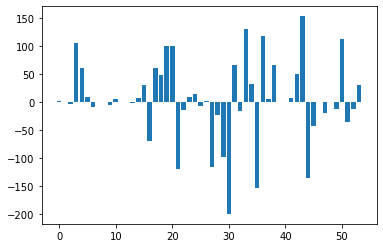

price vs host_response_rate: 0.14641096105455198
price vs host_acceptance_rate: 0.07026967653895254
price vs bathrooms_text: 0.5752306480970781
price vs bedrooms: 0.5143945514759577
price vs beds: 0.43255534742660684
price vs price: 1.0
price vs review_scores_rating: 0.12805693558270112
price vs review_scores_accuracy: 0.09215332218206129
price vs review_scores_cleanliness: 0.07339032304034712
price vs review_scores_checkin: 0.07321005949284826
price vs review_scores_communication: 0.10436472486280148
price vs review_scores_location: 0.08513742804211637
price vs review_scores_value: -0.02371511040454879
price vs reviews_per_month: -0.02509416584491653
price vs bathrooms_shared: -0.21948255133743652


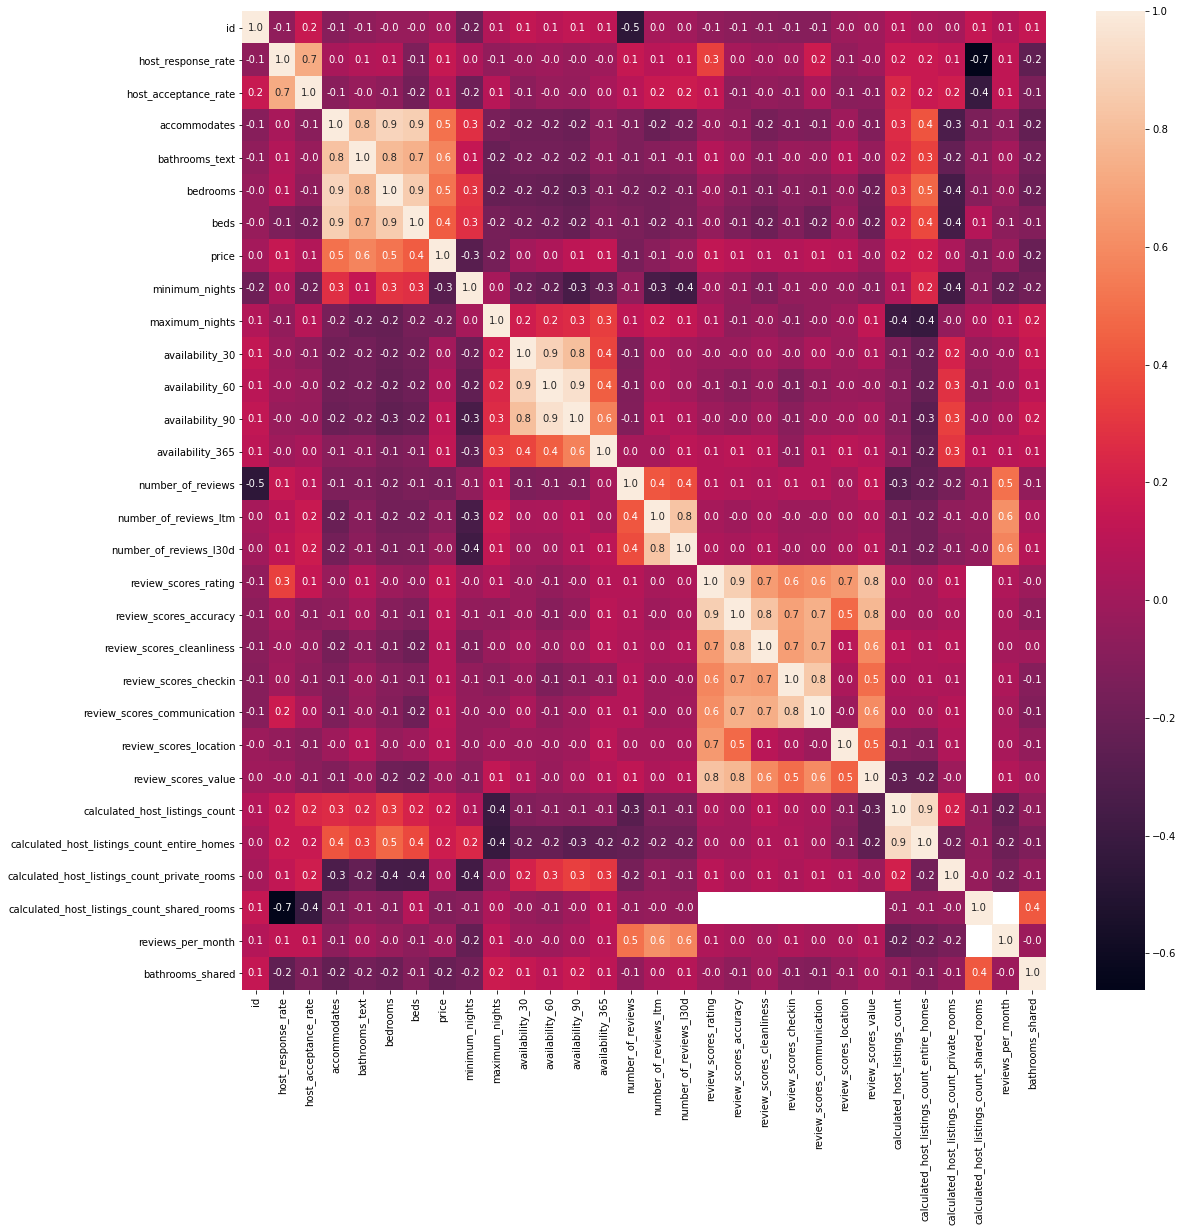

In [22]:
#Predict listing price

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

y_train_preds = lm_model.predict(X_train)
train_rsquared_score = r2_score(y_train, y_train_preds)
length_y_train = len(y_train)
"The r-squared score for your model of the train set was {} on {} values.".format(train_rsquared_score, length_y_train)

# get importance
importance = lm_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

fig, ax = plt.subplots(figsize=(18,18))         # Sample figsize in inches
sns.heatmap(df_new.corr(), annot=True, fmt=".1f")  #, fmt=".1f"


#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

num_vars = df_new.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    correlation = df_new['price'].corr(df_new[col])
    print("price vs " + col  +": " + str(correlation))

Q4. What's the hottest month over the year?

In [194]:
import datetime as dt
df_calendar['date'] = pd.to_datetime(df_calendar['date'], errors='coerce')
df_calendar['month'] = df_calendar['date'].dt.month

In [229]:
df_calendar[df_calendar['available']=='f']['month'].value_counts().sort_values(ascending=False)
#November is the hottest month over the year, followed by October and December

11    3751
10    3155
12    3142
8     3030
7     2809
5     2745
3     2720
1     2629
2     2614
6     2584
9     2570
4     2427
Name: month, dtype: int64